# Understat Series : Heatmaps



**By Jose Gonzalez**


**Was greatly inspired by the [This FC Python Tutorial](https://fcpython.com/visualisation/football-heatmaps-seaborn) They have a great webape explaining basics , shotmaps, passing networks, dashboards etc , [Check out their website](https://fcpython.com/)**

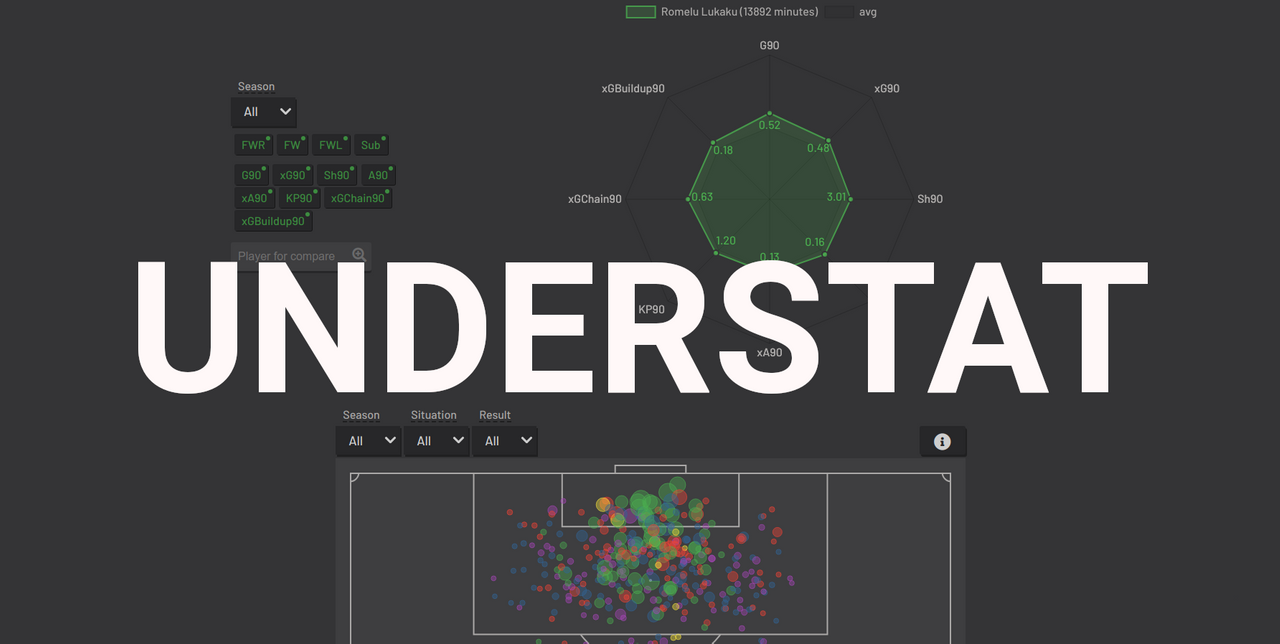

<a id="1."></a>
# Introduction
Although most of the soccer heatmaps are for passes and tackles and movement, I think it's interesting the do a quick analysis of heatmaps for shots. Based on the tutorial above from FC Python , I've decided to explore this topic using Understat's data.

<a id="1.1"></a>
# Notebook content

* [1. Introduction](#1.)
    - [1.1. Notebook Content.](#1.1)
* [2.Importing libraries.](#2.)
* [3.Scraping shots](#3.)
    - [3.1. Scraping match IDs.](#3.1)
    - [3.2. Understat for loops.](#3.2)
* [4. Filtering FC Barcelona shots](#4.)
* [5. Draw pitch](#5.)
* [6. Plotting the Heatmaps](#6.)
   -  [6.1. Free kicks vs Corners.](#6.1)
   -  [6.2. Messi Goals vs Messi Shots](#6.2)
   -  [6.3. Pedri vs Dembele shots](#6.3)
   -  [6.4. All shots overlaid](#6.4)
* [7. References](#7.)


<a id="2."></a>
# Importing Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from highlight_text import fig_text
from matplotlib.patches import Arc
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import re

<a id="3."></a>
# Scraping shots
In order to scrape all shots taken by each player from la liga, we must first scrape their IDs and change their data type from obj to int and then run a loop with those values to scrape all the shots the players have taken throughout their careers.

<a id="3.1"></a>
## Scraping the match IDs

In [2]:
# Entering the league's  link
link = "https://understat.com/league/La_liga"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the players stats 
strings = scripts[3].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)
# Creating the dataframe
all_shots = pd.DataFrame(data)
# Changing the data type using pd.to_numeric() function
all_shots["id"] = pd.to_numeric(all_shots["id"])
idd = all_shots["id"].values.tolist()

<a id="3.2"></a>
## Understat for loops
Once the match IDs have scraped, let's run the loop , it'll take around 10 minutes : 

In [3]:
shoots = pd.DataFrame()
for i in tqdm(idd):
    url = f"https://understat.com/player/{i}"
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[3].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    data = json.loads(json_data)
    shoots = shoots.append(pd.DataFrame(data))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 570/570 [08:46<00:00,  1.08it/s]


<a id="4."></a>
# Filtering FC Barcelona shoots
Now that we've scraped every single shot in La Liga, let's focus on shots taken by FC Barcelona :

In [4]:
barca_shoots = shoots[(shoots["h_team"]=="Barcelona")|((shoots["a_team"]=="Barcelona"))]
print(barca_shoots.shape)
display(barca_shoots.head(9))

(4744, 20)


,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
5,32779,65,SavedShot,0.7230000305175781,0.49400001525878906,0.054804932326078415,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
6,32780,66,MissedShots,0.9119999694824219,0.49900001525878906,0.0971858948469162,Lionel Messi,a,2097,FromCorner,2014,Head,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Ivan Rakitic,Cross
7,32787,71,BlockedShot,0.885,0.6020000076293945,0.11467907577753067,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Rafinha,Pass
8,32788,76,BlockedShot,0.875999984741211,0.43900001525878907,0.10627452284097672,Lionel Messi,a,2097,OpenPlay,2014,RightFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Dani Alves,Pass


We've got 4744 shots taken by Barcelona in the 2020/2021 Season , now let's change the data types of a few columns in order to manipulate them for further analysis and modify the field dimensions to adjust to our soccer pitch:

In [72]:
# Changing data types
barca_shoots['X'] = barca_shoots['X'].astype('float64')
barca_shoots['Y'] = barca_shoots['Y'].astype('float64')

# Adjustind dimensions for soccer pitch
barca_shoots['X1'] = (barca_shoots['X']/100)*105*100
barca_shoots['Y1'] = (barca_shoots['Y']/100)*68*100


<ipython-input-72-c6c13adcd191>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_shoots['X'] = barca_shoots['X'].astype('float64')
<ipython-input-72-c6c13adcd191>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_shoots['Y'] = barca_shoots['Y'].astype('float64')
<ipython-input-72-c6c13adcd191>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<a id="5."></a>
# Football Pitch
Now let's create the soccer pitch and once again it's all thanks again to [This FC Python Tutorial](https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib)

In [6]:
def football_pitch(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="#f0f0f0",
               line_color='black',
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               axis='off',
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")


    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")
    
    ax.axis(axis)

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # x dimension markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # y dimension markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer box
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard box
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Halfline, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]


    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

<a id="6."></a>
# Plotting heatmaps
Before plotting the heatmaps let's separate the shots by situation, let's check the situations available within the data : 

In [73]:
print(barca_shoots.situation.unique())

['OpenPlay' 'DirectFreekick' 'FromCorner' 'Penalty' 'SetPiece']


We'll ignore Penalties because it does not make sense to plot it, it's always the same starting point.

In [ ]:
open_play = barca_shoots[barca_shoots["situation"]=="OpenPlay"]
free_kick = barca_shoots[barca_shoots["situation"]=="DirectFreekick"]
corner =  barca_shoots[barca_shoots["situation"]=="FromCorner"]
set_piece = barca_shoots[barca_shoots["situation"]=="SetPiece"]

<a id="6.1"></a>
## Free kicks and Corners
Now finally let's plot the heatmaps, let's start by 2 heatmaps one for free kicks and one for Penalties 

C:\Users\jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


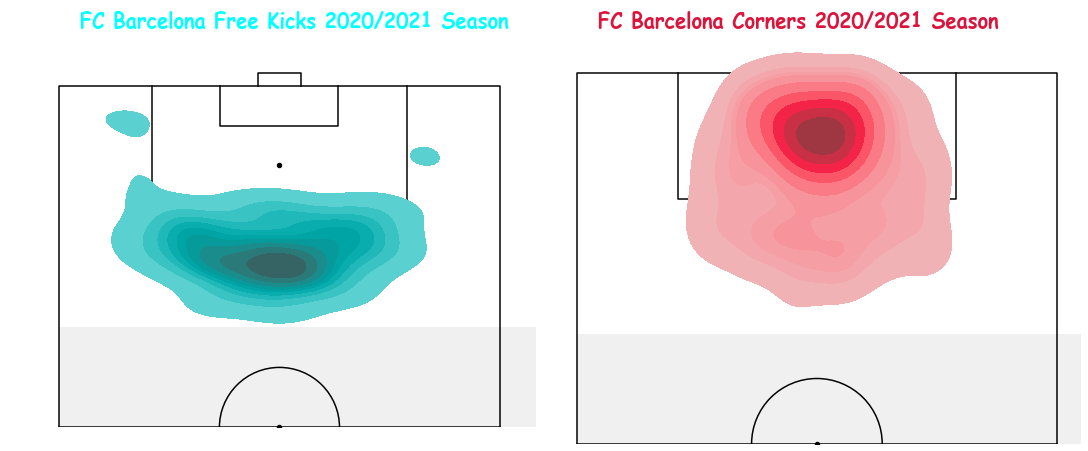

In [74]:
fig = plt.figure(figsize=(15,20),constrained_layout=True)
gs = fig.add_gridspec(nrows=1,ncols=2)

ax = fig.add_subplot(gs[0])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax)
sns.kdeplot(free_kick["Y1"],free_kick["X1"], shade="True",color="cyan", levels = 10)

ax1 = fig.add_subplot(gs[1])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax1)
sns.kdeplot(corner["Y1"],corner["X1"], shade="True",color="crimson", levels = 10)

fig_text(0.55,0.66, s="FC Barcelona Corners 2020/2021 Season",font='Comic Sans MS',fontsize=20,fontweight="bold",color='crimson')
fig_text(0.07,0.66, s="FC Barcelona Free Kicks 2020/2021 Season",font='Comic Sans MS',fontsize=20,fontweight="bold",color='cyan')

<a id="6.2"></a>
## Messi Goals vs Total Shots
Now let's plot the goals scored by Messi and the total shots taken by him : 

In [75]:
messi = barca_shoots[barca_shoots["player"]=="Lionel Messi"]
messi_goals = messi[messi['result']=="Goal"]

C:\Users\jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


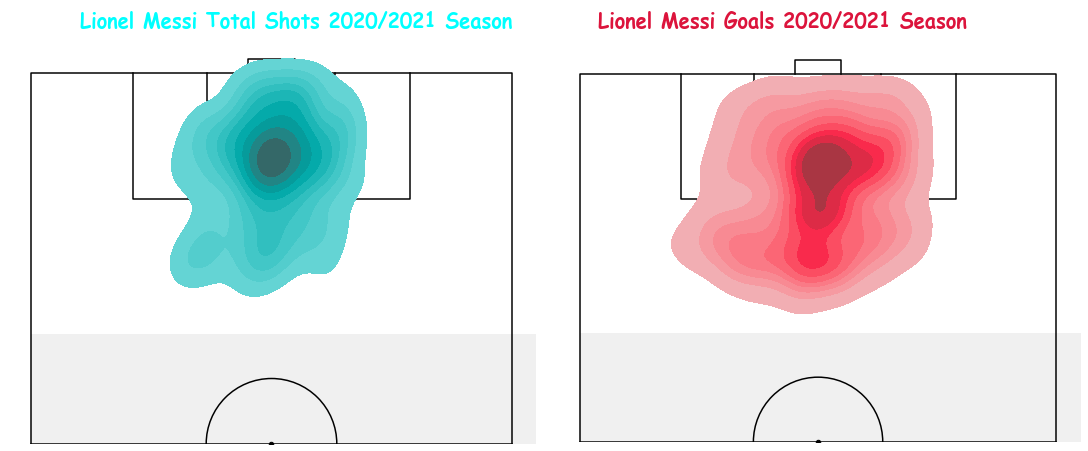

In [76]:
fig = plt.figure(figsize=(15,20),constrained_layout=True)
gs = fig.add_gridspec(nrows=1,ncols=2)

ax = fig.add_subplot(gs[0])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax)
sns.kdeplot(messi_goals["Y1"],messi_goals["X1"], shade="True",color="cyan", levels = 10)

ax1 = fig.add_subplot(gs[1])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax1)
sns.kdeplot(messi["Y1"],messi["X1"], shade="True",color="crimson", levels = 10)

fig_text(0.55,0.66, s="Lionel Messi Goals 2020/2021 Season",font='Comic Sans MS',fontsize=20,fontweight="bold",color='crimson')
fig_text(0.07,0.66, s="Lionel Messi Total Shots 2020/2021 Season",font='Comic Sans MS',fontsize=20,fontweight="bold",color='cyan')

<a id="6.3"></a>
## Pedri and Dembele Shots 2020/2021 Season
Let's go now to my other two favorite players Pedri and Dembele

In [77]:
pedri = barca_shoots[barca_shoots["player"]=="Pedri"]
dembele = barca_shoots[barca_shoots["player"]=="Ousmane Dembélé"]


C:\Users\jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


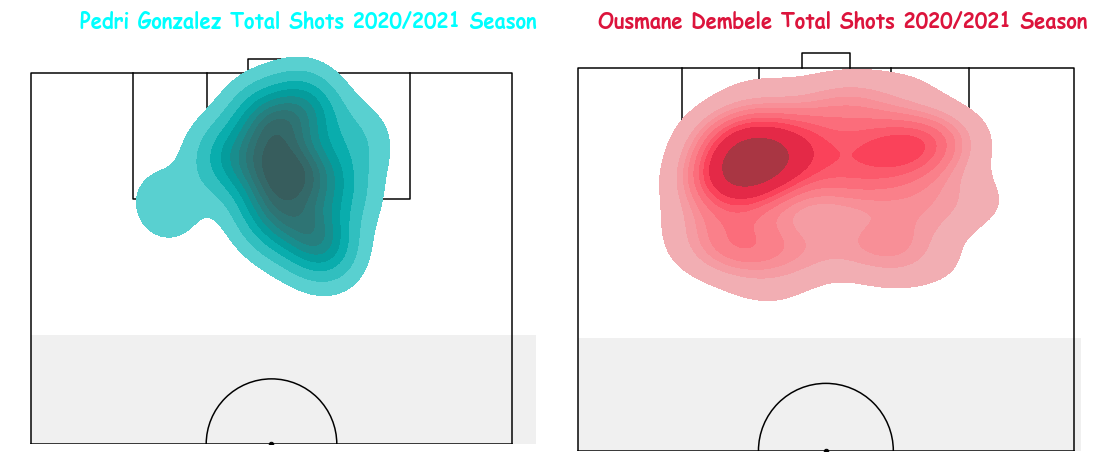

In [78]:
fig = plt.figure(figsize=(15,20),constrained_layout=True)
gs = fig.add_gridspec(nrows=1,ncols=2)

ax = fig.add_subplot(gs[0])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax)
sns.kdeplot(pedri["Y1"],pedri["X1"], shade="True",color="cyan", levels = 10)

ax1 = fig.add_subplot(gs[1])
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax1)
sns.kdeplot(dembele["Y1"],dembele["X1"], shade="True",color="crimson", levels = 10)

fig_text(0.55,0.66, s="Ousmane Dembele Total Shots 2020/2021 Season",font='Comic Sans MS',fontsize=20,fontweight="bold",color='crimson')
fig_text(0.07,0.66, s="Pedri Gonzalez Total Shots 2020/2021 Season",font='Comic Sans MS',fontsize=20,fontweight="bold",color='cyan')

Looking at Dembele's heatmap it's remarkable his control of both sides of the pitch as he's ambidextrous

<a id="6.4"></a>
## All Barcelona shots last season overlaid 
Finally let's overlay every shot taken in la liga by their situation:

C:\Users\jose\anaconda3\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Y1', ylabel='X1'>

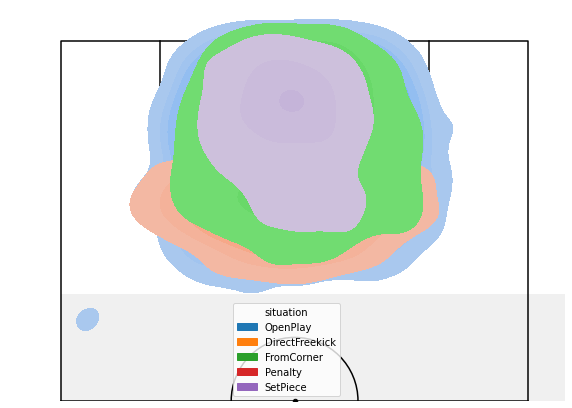

In [71]:
fig, ax = plt.subplots(figsize=(10, 14))
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax)
#sns.kdeplot(free_kick["X1"],free_kick["Y1"], levels = 800, thresh = 0.3,shade=True,color="cyan")
sns.kdeplot(data=barca_shoots, x="Y1", y="X1", hue="situation", fill=True,shade=True,levels=10)


<a id="7."></a>
# References
As stated befor the main reference for this notebooks was [This FC Python Tutorial](https://fcpython.com/visualisation/football-heatmaps-seaborn) and also this [notebook](https://github.com/coder-harshil/Football-Data-Scraping-Cleaning-and-Visualization/blob/main/Heatmap.py)